In [ ]:
"""
Import necessary packages
"""

# import os and set devices to only cpu
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# all other imports
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
from log_reg_utilities import *


"""
Complete checks to ensure status of TensorFlow
"""

# ensure eager execution
print("Eager execution:", tf.executing_eagerly())

# check if GPU is available on system
device_name = tf.config.list_physical_devices("GPU")

if(device_name):
    print(f"GPU Available: {device_name}")
else:
    print("CPU Only")

2025-10-05 10:12:27.740154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759684347.761240  100051 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759684347.768220  100051 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Eager execution: True
CPU Only


2025-10-05 10:12:31.847265: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-10-05 10:12:31.847323: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:137] retrieving CUDA diagnostic information for host: AGSTUF
2025-10-05 10:12:31.847330: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:144] hostname: AGSTUF
2025-10-05 10:12:31.847446: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:168] libcuda reported version is: 580.82.9
2025-10-05 10:12:31.847482: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:172] kernel reported version is: 580.82.9
2025-10-05 10:12:31.847489: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:259] kernel version seems to match DSO: 580.82.9


Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
Epoch 1/30


2025-10-05 10:12:32.329419: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7645 - loss: 0.7160 - val_accuracy: 0.8212 - val_loss: 0.5412
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8305 - loss: 0.5082 - val_accuracy: 0.8333 - val_loss: 0.4862
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8401 - loss: 0.4705 - val_accuracy: 0.8437 - val_loss: 0.4606
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.4476 - val_accuracy: 0.8480 - val_loss: 0.4423
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8504 - loss: 0.4344 - val_accuracy: 0.8507 - val_loss: 0.4329
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8553 - loss: 0.4248 - val_accuracy: 0.8532 - val_loss: 0.4265
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.4188 - val_accuracy: 0.8518 - val_loss: 0.4230
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8586 - loss: 0.4129 - val_accuracy: 0.8550 - val_

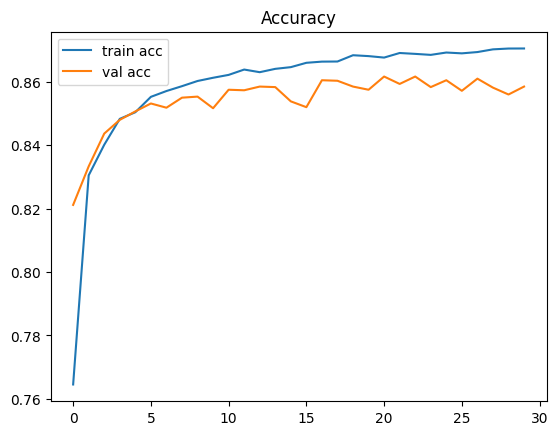

Train Set:        (54000, 784), (54000,)
Validation Set:   (6000, 784) , (6000,)
Test Set :        (10000, 784), (10000,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


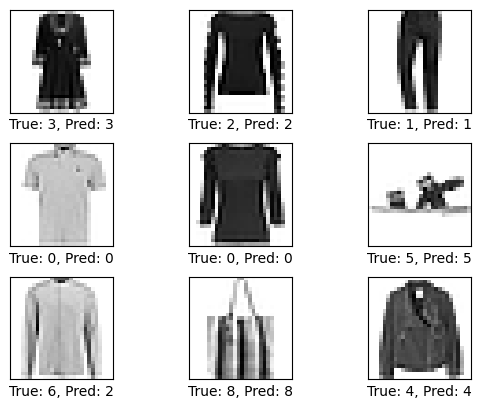

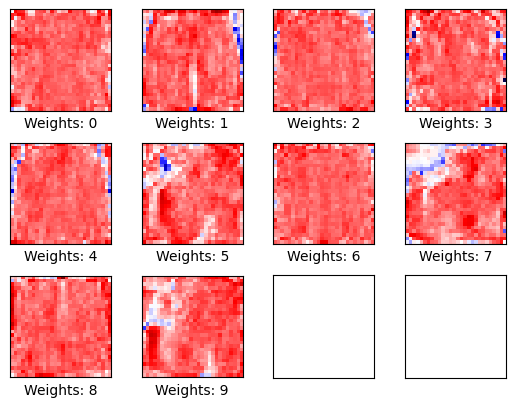

In [ ]:
# TEMPLATE

model, history_res = run_model(learning_rate = 0.001,
                               input_batch_size = 100,
                               n_epochs = 30,
                               val_fract = .10,
                               optimizer_type = ADAM)

plt.plot(history_res.history["accuracy"], label="train acc")
plt.plot(history_res.history["val_accuracy"], label="val acc")
plt.legend(); plt.title("Accuracy"); plt.show()

# get test data (MAKE SURE 0.1 MATCHES VAL_FRACT)
X_val, y_val, X_train, y_train, X_test, y_test = get_data(0.1)

# select 9 samples
idx = np.random.choice(len(X_test), 9, replace=False)
sample_images = X_test[idx]
true_labels = y_test[idx]

# predict
pred_probs = model.predict(sample_images)
yhat = np.argmax(pred_probs, axis=1)

# plot both the images and the weights
plot_images(sample_images, true_labels, yhat)
plot_weights(model)